In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from utils import classification_evaluation, user_input, pipe_model

In [2]:
dataframe =  pd.read_csv('../data/cleaned_dataset_2.csv')
dataframe = dataframe.drop(['age', 'id'], axis=1)

In [3]:
dataframe.head()

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,gender_women
0,140,90,3,1,0,0,1,1,55,34.927679,1
1,130,70,3,1,0,0,0,1,52,23.507805,1
2,100,60,1,1,0,0,0,0,48,23.011177,1
3,130,80,3,1,0,0,1,0,61,37.729725,1
4,130,90,3,3,0,0,1,1,62,29.983588,0


In [4]:
X1, y1 = dataframe.drop("cardio", axis=1), dataframe["cardio"]
# use the same test set as in previous lecture
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [5]:
X_train_for_val, X_val, y_train_for_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

X_train_for_val.shape, X_val.shape, y_train_for_val.shape, y_val.shape

((25288, 10), (6322, 10), (25288,), (6322,))

In [6]:
scaler = StandardScaler()

pipeline_log_regression = Pipeline(
    [
        ("scaler", scaler),
        (
            "log",
            LogisticRegression(
                solver="saga", multi_class="ovr", max_iter=10000, penalty="elasticnet"
            ),
        ),
    ]
)


l1_ratio = np.linspace(0, 1, 50)

parameter_grid_log_regression = {"log__l1_ratio": l1_ratio}

classifier_log_regression = GridSearchCV(
    estimator=pipeline_log_regression,
    param_grid=parameter_grid_log_regression,
    cv=5,
    scoring="accuracy",
)


In [7]:
classifier_log_regression.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612,...
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      3211
           1       0.76      0.64      0.70      3111

    accuracy                           0.72      6322
   macro avg       0.73      0.72      0.72      6322
weighted avg       0.73      0.72      0.72      6322



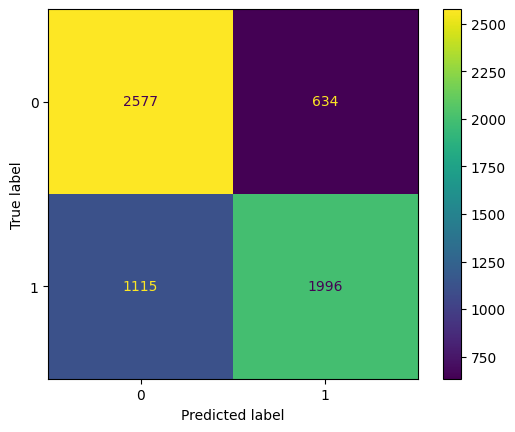

In [8]:
classification_evaluation(model=classifier_log_regression, x_test=X_val, y_test=y_val)

In [9]:
#Training entire X_train dataset

classifier_log_regression.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612,...
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='accuracy')

In [10]:
y_predictions = classifier_log_regression.predict(X_test)

In [11]:
print(y_predictions[:20], y_test[:20].to_list())

[1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0] [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]


----

## Deployment

In [12]:
pipe = pipe_model(("scaler", scaler), ("lr", LogisticRegression(l1_ratio=0.42857142857142855, max_iter=10000,
                      multi_class='ovr', penalty='elasticnet', solver='saga')))

In [14]:
user1 = user_input(ap_hi=[80], ap_lo=[60],cholesterol=[1], smoke=[0], active=[1],gluc=[1],alco=[0], age=[40],bmi=[29], gender=[1])
user1

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
0,80,60,1,1,0,0,1,40,29,1


In [15]:
user2 = user_input(ap_hi=[120], ap_lo=[100],cholesterol=[2], smoke=[1], active=[0],gluc=[1],alco=[0], age=[56],bmi=[32], gender=[1])
user2

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
0,120,100,2,1,1,0,0,56,32,1


In [16]:
pipe.predict(user1)

array([0])

In [17]:
pipe.predict(user2)

array([1])